In [410]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import numpy as np
import os
import re
import importlib
import seaborn as sns
import math

In [429]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.ace.data_utilities as ace_utils
importlib.reload(ace_utils)
print("Finish importing scripts.")

Finish importing scripts.


In [412]:
sns.set(font_scale=2)
sns.set_style("white")

# Loading, Processing, and Extracting XS Data from ACE

In [413]:
nsx, jxs, xss = ace_utils.get_nsx_jxs_xss("92233", temp="03c", ace_dir=ace_dir)

In [414]:
nes, ntr, energy_pointer, mt_pointer, xs_pointers, xs_table_pointer, mt_18_pointer = ace_utils.get_pointers(nsx, jxs)

In [415]:
energies, mt_array, lsig = ace_utils.get_energies_mt_lsig(xss, energy_pointer, nes, mt_pointer, ntr, xs_pointers)

In [416]:
mt1, mt2, mt3, mt101 = ace_utils.get_mt1_mt2_mt3_mt101(xss, nes)

# Adjusting High and Low Energy Cross Section Areas

In [417]:
mt_data = {"mt1":mt1, "mt2":mt2, "mt3":mt3}

In [418]:
u233_ml = pd.read_csv("U233_Data_ML.csv")

In [419]:
u233_ml_mod = ace_utils.get_merged_df(u233_ml, lsig, xs_table_pointer, jxs, xss, mt_data, mt_array)

8742 Energy and 8742 Cross Section Points Avaliable for MT18.
8742 Energy and 8742 Cross Section Points Avaliable for MT102.


# Visualizing MT1, MT18, and MT102

In [420]:
sig_18, en_18, start_18, end_18 = sig_mt(18, mt_array, lsig, xs_table_pointer, jxs, xss)
sig_102, en_102, start_102, end_102 = sig_mt(102, mt_array, lsig, xs_table_pointer, jxs, xss)

8742 Energy and 8742 Cross Section Points Avaliable.
8742 Energy and 8742 Cross Section Points Avaliable.


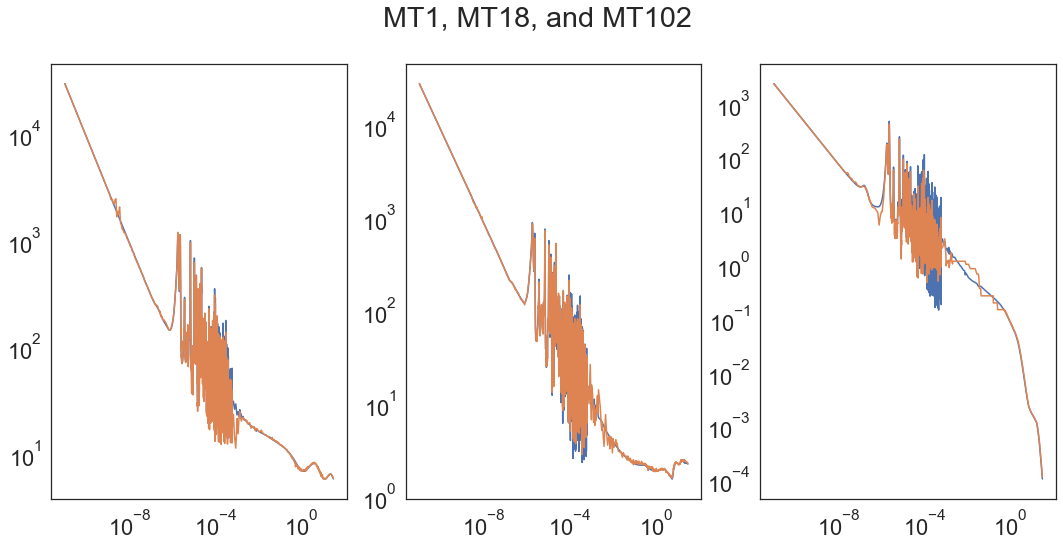

In [421]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,8))
fig.suptitle('MT1, MT18, and MT102')

ax1.loglog(energies, mt1)
ax1.loglog(u233_ml.Energy, u233_ml.Data_1)

ax2.loglog(en_18, sig_18)
ax2.loglog(u233_ml.Energy, u233_ml.Data_18)

ax3.loglog(en_102, sig_102)
ax3.loglog(u233_ml.Energy, u233_ml.Data_102)

# Creating Energy Grid DataFrame and Creating MT101 and  MT3 Data

In [422]:
Energy_Grid = ace_utils.make_energy_mt_grid(
    energies, mt_array, lsig, xs_table_pointer, jxs, xss, u233_ml, ["Data_1", "Data_18", "Data_102"])

# Calculating MT2 and adjusting MT1

In [423]:
Energy_Grid = ace_utils.adjust_mt1_mt2(Energy_Grid)

# Plotting Cross Sections

In [273]:
# %matplotlib qt

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_18, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_1, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, mt1, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_102, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, sig_102, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_101, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, mt101, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_2, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, mt2, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.Data_3, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, mt3, linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
# fig.suptitle('ENDF vs ML Cross Sections for U-233')

axs[0, 0].loglog(energies, Energy_Grid.Data_18, linestyle="dotted", linewidth=5, label="ML")
axs[0, 0].loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 0].set_title("MT 18")
axs[0, 0].legend()

axs[0, 1].loglog(energies, Energy_Grid.Data_1, linestyle="dotted", linewidth=5, label="ML")
axs[0, 1].loglog(energies, mt1, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 1].set_title("MT 1")
axs[0, 1].legend()

axs[0, 2].loglog(energies, Energy_Grid.Data_102, linestyle="dotted", linewidth=5, label="ML")
axs[0, 2].loglog(energies, sig_102, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 2].set_title("MT 102")
axs[0, 2].legend()

axs[1, 0].loglog(energies, Energy_Grid.Data_101, linestyle="dotted", linewidth=5, label="ML")
axs[1, 0].loglog(energies, mt101, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 0].set_title("MT 101")
axs[1, 0].legend()

axs[1, 1].loglog(energies, Energy_Grid.Data_2, linestyle="dotted", linewidth=5, label="ML")
axs[1, 1].loglog(energies, mt2, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 1].set_title("MT 2")
axs[1, 1].legend()

axs[1, 2].loglog(energies, Energy_Grid.Data_3, linestyle="dotted", linewidth=5, label="ML")
axs[1, 2].loglog(energies, mt3, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 2].set_title("MT 3")
axs[1, 2].legend()


fig.text(0.5, 0.04, 'Energy (MeV)', ha='center')
fig.text(0.04, 0.5, 'Cross Section (mb)', va='center', rotation='vertical')

In [ ]:
Energy_Grid.to_csv("ML_GRID.csv", index=False)

In [424]:
Energy_Grid

,Data_16,Data_17,Data_18,Data_37,Data_51,Data_52,Data_53,Data_54,Data_55,Data_56,Data_57,Data_58,Data_59,Data_60,Data_61,Data_62,Data_63,Data_64,Data_65,Data_66,Data_67,Data_68,Data_69,Data_70,Data_71,Data_72,Data_73,Data_74,Data_75,Data_76,Data_77,Data_78,Data_79,Data_80,Data_81,Data_82,Data_83,Data_84,Data_85,Data_86,Data_87,Data_88,Data_91,Data_102,Data_4,Data_1,Data_3,Data_101,Data_2
Energy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.000000e-11,0.000000,0.000000,26877.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2232.315000,0.000000,29157.207400,29109.835000,2232.315000,47.372400
1.125000e-11,0.000000,0.000000,25340.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2104.648000,0.000000,27489.828900,27445.008000,2104.648000,44.820900
1.250000e-11,0.000000,0.000000,24039.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.647000,0.000000,26079.287200,26036.617000,1996.647000,42.670200
1.375000e-11,0.000000,0.000000,22921.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1903.729000,0.000000,24865.765600,24824.939000,1903.729000,40.826600
1.500000e-11,0.000000,0.000000,21945.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1822.684000,0.000000,23807.298300,23768.074000,1822.684000,39.224300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.800000e+01,0.056734,0.045851,2.296800,0.149627,0.089681,0.039340,0.009014,0.000025,0.004165,0.000036,0.000007,0.001449,0.000013,0.000016,0.000020,0.000024,0.000011,0.000008,0.000659,0.000012,0.000024,0.000041,0.000032,0.000014,0.000013,0.000021,0.000029,0.000019,0.00001,0.000020,0.000028,0.000018,0.000021,0.000022,0.000021,0.000046,0.000031,0.024502,0.001733,0.010878,0.010814,0.001975,0.062356,0.000155,0.257150,5.928545,2.806318,0.000155,3.122227
2.850000e+01,0.055079,0.041571,2.296800,0.163561,0.089224,0.039059,0.008865,0.000024,0.004089,0.000036,0.000007,0.001415,0.000012,0.000016,0.000020,0.000023,0.000011,0.000008,0.000639,0.000012,0.000024,0.000041,0.000032,0.000014,0.000013,0.000020,0.000029,0.000019,0.00001,0.000019,0.000027,0.000018,0.000020,0.000021,0.000021,0.000045,0.000030,0.024305,0.001711,0.010791,0.010729,0.001960,0.061695,0.000141,0.255056,5.881533,2.812208,0.000141,3.069325
2.900000e+01,0.053518,0.037741,2.280800,0.176420,0.088789,0.038800,0.008731,0.000024,0.

# Implementing changes to XSS

We changed:
- MT1
- MT2
- MT101
- MT102
- MT18

In [425]:
xss = ace_utils.modify_mt_ace([1, 2, 101, 102, 18], xss, Energy_Grid, nes, mt_array, lsig, xs_table_pointer, jxs)

8742 Energy and 8742 Cross Section Points Avaliable for MT102.
8742 Energy and 8742 Cross Section Points Avaliable for MT18.


In [426]:
mt1, mt2, mt3, mt101 = ace_utils.get_mt1_mt2_mt3_mt101(xss, nes)

# Compiling new ACE file

In [430]:
ace_utils.creating_new_ace(xss, "92233")